# PREDICTION OF AUTOMOTIVE ACCIDENT SEVERITY

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

In [ ]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import os
import csv

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## DATA PREPROCESSING 

In [56]:
df1 = pd.read_csv('data/2014 excel.csv')
df2 = pd.read_csv('data/2015 excel.csv')
df3 = pd.read_csv('data/2016 excel.csv')

In [57]:
#merging files#
frames = [df1, df2, df3]
result = pd.concat(frames, axis=0)

In [58]:
#deleting columns and data#
result= result.drop(['Grid Ref: Northing','Grid Ref: Easting','Reference Number','Expr1','Accident Date','Lighting Conditions','1st Road Class'],axis=1)
result= result.dropna(axis=0)

In [59]:

#listing objects#
list1=['Monday','Tuesday','Wednesday','Thursday']
list2=['Friday','Saturday','Sunday']
list3=['Fine without high winds','Fine with high winds']
list4=['Snowing without high winds','Snowing with high winds']
list5=['Raining without high winds','Raining with high winds']
list6=['Fog or mist']
list7=['Minibus (8 to 16 passenger seats)','Bus or coach (17 or more passenger seats)']
list8=['Goods vehicle 3.5 tonnes mgw and under','Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw','goods','Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw']
list9=['Motorcycle over 50cc and up to 125cc','Motorcycle over 125cc and up to 500cc','M cycle 50cc and under','Motorcycle over 500cc','Motorcycle Unknown CC']
list10=['Car','Taxi or Private hire car']



In [60]:
#listing day

def b(row):
    if row['Day']in list1:
        val='weekday'
    elif row['Day']in list2:
        val='weekend'
    return val
result['Day'] = result.apply(b, axis=1)


#listing weather conditions#

def e(row):
    if row['Weather Conditions']in list3:
        val='fine'
    elif row['Weather Conditions']in list4:
        val='snowing'
    elif row['Weather Conditions']in list5:
        val='raining'
    elif row['Weather Conditions']in list6:
        val='fog'
    else: 
        val='other'   
    return val
result['Weather Conditions'] = result.apply(e, axis=1)

#listing type of vehicle

def j(row):
    if row['Type of Vehicle']in list7:
        val='bus'
    elif row['Type of Vehicle']in list8:
        val='goods vehicle'
    elif row['Type of Vehicle']in list9:
        val='motorcycle'
    elif row['Type of Vehicle']in list10:
        val='car'
    else: 
        val='other'
    return val
result['Type of Vehicle'] = result.apply(j, axis=1)


#listing Time

def c(row):
    if 600< row['Time (24hr)'] <= 1801:
        val='Day-time'
    else:
        val='Night-time'
    return val
result['Time (24hr)'] = result.apply(c, axis=1)

#Dummies
result=pd.get_dummies(result,columns=['Day','Time (24hr)','Road Surface','Weather Conditions','Casualty Class','Sex of Casualty','Type of Vehicle'])

#dealing with columns containing the same information
result = result.drop(['Day_weekday', 'Time (24hr)_Day-time', 'Sex of Casualty_Female'] , axis=1)


In [61]:
result

Number of Vehicles Casualty Severity  Age of Casualty  Day_weekend  \
0                      1           Serious               19            1   
1                      1           Serious               19            1   
2                      1           Serious               21            1   
3                      1            Slight               23            1   
4                      2           Serious               60            0   
5                      2           Serious               41            0   
6                      2            Slight               61            0   
7                      2            Slight               26            1   
8                      1            Slight               23            1   
9                      1            Slight                7            0   
10                     2           Serious               33            0   
11                     2           Serious               22            0   
12                     1            Slight               19            1   
13                     1            Slight               20            1   
14                     2            Slight               38            0   
15                     1            Slight               26            0   
16                     2           Serious               41            0   
17                     2            Slight               72            0   
18                     1            Slight               23            1   
19                     2            Slight               29            1   
20                     2            Slight               43            0   
21                     1           Serious               33            0   
22                     1            Slight               17            0   
23                     1            Slight               17            0   
24                     1            Slight               18            0   
25                     1            Slight               17            0   
26                     1            Slight               17            0   
27                     3            Slight               50            1   
28                     3           Serious               41            1   
29                     3            Slight               14            1   
...                  ...               ...              ...          ...   
2519                   1           Serious               33            0   
2520                   1            Slight               22            0   
2521                   2            Slight               20            0   
2522                   2            Slight               18            0   
2523                   2            Slight               47            0   
2524                   5            Slight               22            0   
2525                   5           Serious               21            0   
2526                   1            Slight               36            0   
2527                   2            Slight               39            0   
2528                   2            Slight               60            0   
2529                   2            Slight               30            0   
2530                   2            Slight                7            0   
2531                   2            Slight                6            0   
2532                   2            Slight                4            0   
2533                   2            Slight               25            0   
2534                   1            Slight               22            0   
2535                   2            Slight               66            0   
2536                   1            Slight               82            0   
2537                   2            Slight               41            0   
2538                   1            Slight               23            0   
2539                   3            Slight            

## RANDOM TREE

In [62]:
#dividing into train and test datasets

from sklearn.model_selection import train_test_split
  
X = result.drop('Casualty Severity', axis=1)
y = result['Casualty Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [63]:
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier 

In [64]:
from sklearn.tree import DecisionTreeClassifier  
tree = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)  
tree.fit(X_train, y_train) 
y_pred=tree.predict(X_test)




In [65]:
score = accuracy_score(y_test, y_pred)
print('The accuracy score of decision tree is %.6f' % score)

importance = tree.feature_importances_
column_names = result.columns.values.tolist()
importances = dict(zip(importance, column_names))

important_features = []

for ii in range(len(importance)):
    if ii < 2:
        important_features.append(importances[sorted(importance, reverse = True)[ii]])
        
print('The 2 most important features in decision tree model are: '+str(important_features))


The accuracy score of decision tree is 0.850872
The 2 most important features in decision tree model are: ['Type of Vehicle_goods vehicle', 'Casualty Class_Passenger']


In [66]:
#Plotting decision tree
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree,
                            filled=True, 
                            rounded=True,
                            out_file=None) 
 
graph.write_png('tree.png')

from IPython.display import Image
Image('tree.png', width=1000)

ModuleNotFoundError: No module named 'pydotplus'

## STANDARDIZATION AND PCA ANALYSIS

In [71]:
#standardization 
stdsc = StandardScaler()
X_1 = stdsc.fit_transform(X)

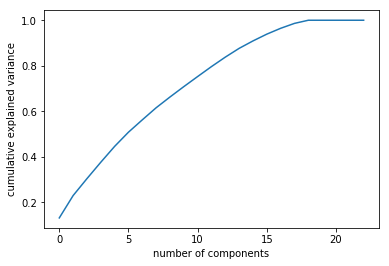

In [72]:
#choosing the number of components for PCA
pca = PCA().fit(X_1.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
#the first 15 components contain approximately 90% of the variance

In [73]:
#PCA
pca = PCA(n_components=15)
X_2 = pca.fit_transform(X_1)